Cris Chou  
Text Classification

In [17]:
#Dataset https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection#
import pandas as pd
df1 = pd.read_csv('../textclass/data/Youtube01-Psy.csv')
df2 = pd.read_csv('../textclass/data/Youtube02-KatyPerry.csv')
df3 = pd.read_csv('../textclass/data/Youtube03-LMFAO.csv')
df4 = pd.read_csv('../textclass/data/Youtube04-Eminem.csv')
df5 = pd.read_csv('../textclass/data/Youtube05-Shakira.csv')
#combine dataframes
df = pd.concat([df1, df2, df3, df4, df5])
df.shape

(1956, 5)

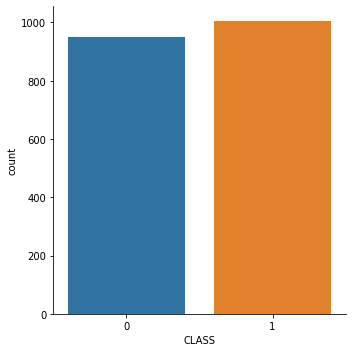

In [18]:
#Graph target distribution (genders)
import seaborn as sb

sb.catplot(x='CLASS', kind='count', data=df)

In [45]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.CONTENT, df.CLASS, test_size=0.2, train_size= 0.8, random_state=1234)
X_train.shape


(1564,)

# Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
import math

In [47]:
#Text preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [48]:
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)

In [49]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# prior
prior_p = sum(y_train == 1)/len(y_train)
naive_bayes.class_log_prior_[1]

-0.6444788116528288

In [50]:
#predicting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
pred = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, pred))

[[183  25]
 [ 11 173]]


## Naive Bayes Report

In [51]:
print('accuracy score: ', accuracy_score(y_test, pred))

print('\nprecision score (not spam): ', precision_score(y_test, pred, pos_label=0))
print('precision score (spam): ', precision_score(y_test, pred))

print('\nrecall score: (not spam)', recall_score(y_test, pred, pos_label=0))
print('recall score: (spam)', recall_score(y_test, pred))
      
print('\nf1 score: ', f1_score(y_test, pred))

accuracy score:  0.9081632653061225

precision score (not spam):  0.9432989690721649
precision score (spam):  0.8737373737373737

recall score: (not spam) 0.8798076923076923
recall score: (spam) 0.9402173913043478

f1 score:  0.9057591623036649


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       208
           1       0.87      0.94      0.91       184

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



In [53]:
#issues
y_test[y_test != pred]

197    0
108    0
293    0
69     0
241    1
218    0
29     0
353    0
261    1
235    0
195    1
411    0
88     1
282    1
239    0
243    0
328    0
16     0
82     0
159    0
198    0
88     0
213    1
87     0
20     0
102    0
228    0
251    1
216    1
208    0
212    0
286    1
300    0
238    1
299    1
180    0
Name: CLASS, dtype: int64

# Logistic Regression

In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(C=2.5, n_jobs=4, solver ='lbfgs', random_state=1234,verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(C=2.5, n_jobs=4, random_state=1234, verbose=1)

In [56]:
pred_logR = clf.predict(X_test)

In [57]:
confusion_matrix(y_test, pred_logR)

array([[205,   3],
       [ 13, 171]], dtype=int64)

In [86]:
print('accuracy score: ', accuracy_score(y_test, pred_logR))
print('precision score: ', precision_score(y_test, pred_logR))
print('recall score: ', recall_score(y_test, pred_logR))
print('f1 score: ', f1_score(y_test, pred_logR))

accuracy score:  0.9591836734693877
precision score:  0.9827586206896551
recall score:  0.9293478260869565
f1 score:  0.9553072625698323


# Neural Networks

In [59]:
from sklearn.neural_network import MLPClassifier

In [83]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200,50,15,2), random_state=1234)
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 50, 15, 2),
              random_state=1234, solver='lbfgs')

In [85]:
pred_nn = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred_nn))
print('precision score: ', precision_score(y_test, pred_nn))
print('recall score: ', recall_score(y_test, pred_nn))
print('f1 score: ', f1_score(y_test, pred_nn))

accuracy score:  0.9617346938775511
precision score:  0.9720670391061452
recall score:  0.9456521739130435
f1 score:  0.9586776859504132


If not enough layers, very low accuracy. 

# Analysis

Neural Networks had the highest accuracy (96.173%), followed by Logistic Regression (95.918%), followed lastly by Naive Bayes (90.816%). Neural Networks tends to perform very well with NLP because of the complex relations between text. The dataset size was not the largest (1956 rows), but it wasn't small enough to allow Naive Bayes to outperform either of Neural Networks or Logistic Regression. Despite having an overall higher accuracy, Logistic Regression was able to have a higher precision score, and a similar F1 score when compared to Neural Networks.  